In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/df4.csv')

# Year - Outliers

In [6]:
# What years?
df['year'].min(), df['year'].max()

(np.int64(1485), np.int64(2025))

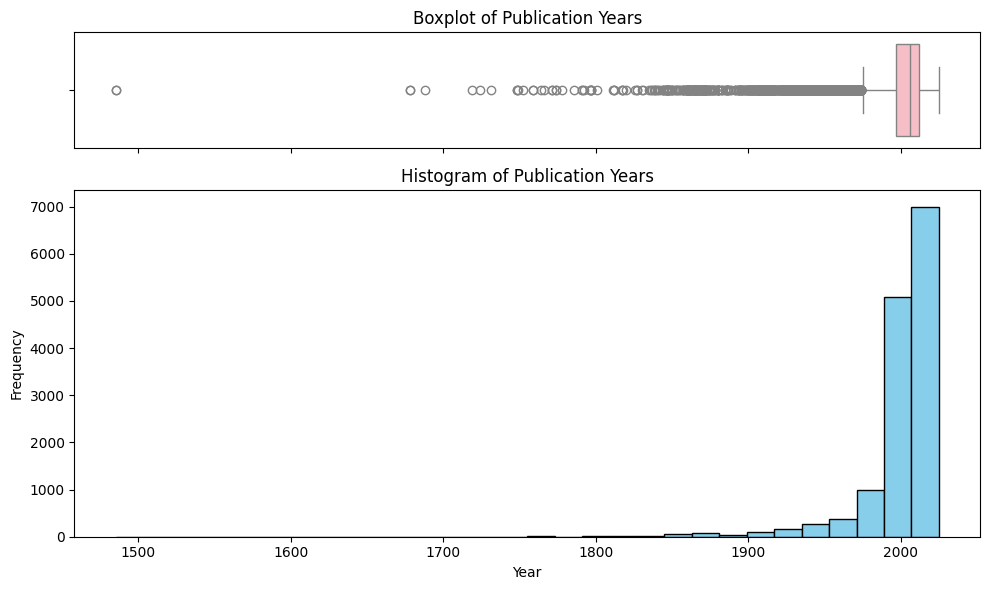

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2, 
    sharex=True, 
    figsize=(10, 6), 
    gridspec_kw={"height_ratios": (1, 3)}
)

# Boxplot on top
sns.boxplot(x=df['year'], ax=ax_box, color='lightpink')
ax_box.set(title='Boxplot of Publication Years')
ax_box.set(xlabel='')  # Remove x-label for the top plot

# Histogram below
ax_hist.hist(df['year'], bins=30, edgecolor='black', color='skyblue')
ax_hist.set(title='Histogram of Publication Years', xlabel='Year', ylabel='Frequency')

plt.tight_layout()
plt.show()


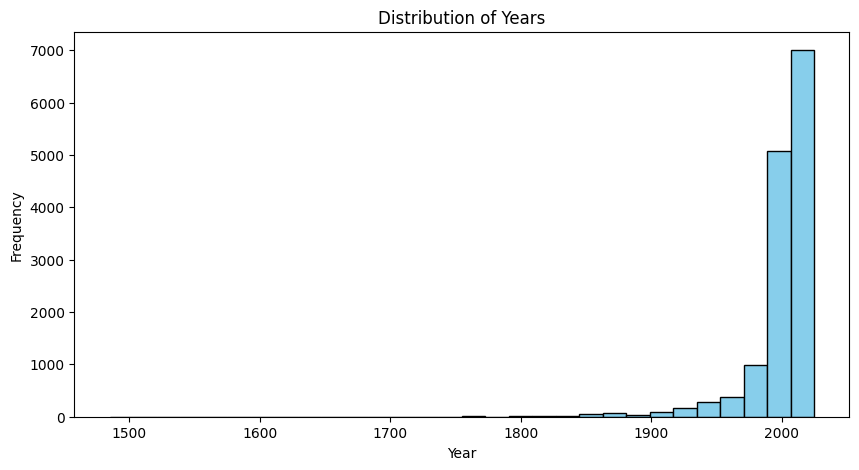

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['year'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

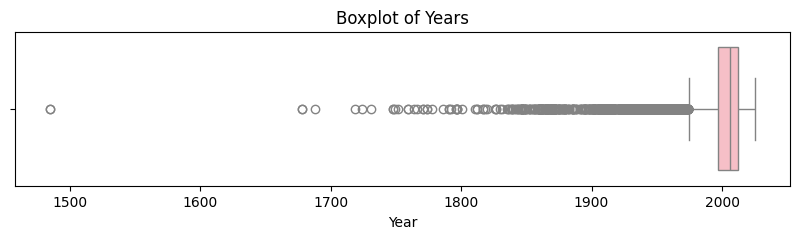

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['year'], color='lightpink')
plt.title("Boxplot of Years")
plt.xlabel("Year")
plt.show()

In [9]:
# Step 1: Compute Q1, Q3, and IQR
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the outlier rows
outlier_years = df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]['year'].unique()
print("Outlier years:", sorted(outlier_years))

Outlier years: [np.int64(1485), np.int64(1678), np.int64(1688), np.int64(1719), np.int64(1724), np.int64(1731), np.int64(1748), np.int64(1749), np.int64(1752), np.int64(1759), np.int64(1764), np.int64(1766), np.int64(1771), np.int64(1774), np.int64(1778), np.int64(1786), np.int64(1791), np.int64(1792), np.int64(1796), np.int64(1797), np.int64(1801), np.int64(1811), np.int64(1812), np.int64(1817), np.int64(1818), np.int64(1820), np.int64(1826), np.int64(1827), np.int64(1830), np.int64(1831), np.int64(1835), np.int64(1836), np.int64(1837), np.int64(1838), np.int64(1839), np.int64(1840), np.int64(1841), np.int64(1842), np.int64(1844), np.int64(1845), np.int64(1846), np.int64(1847), np.int64(1848), np.int64(1849), np.int64(1850), np.int64(1852), np.int64(1853), np.int64(1854), np.int64(1855), np.int64(1857), np.int64(1858), np.int64(1859), np.int64(1860), np.int64(1861), np.int64(1862), np.int64(1863), np.int64(1864), np.int64(1865), np.int64(1866), np.int64(1867), np.int64(1868), np.int64

In [10]:
df_outliers = df[df['year'].isin(outlier_years)]
df_outliers

,title,author,fmc_name,year,author_gender,master_genre,Q4.answer,Q4.explanation,Q5.answer,Q5.explanation,...,Q26.explanation,Q27.answer,Q27.explanation,Q28.answer,Q28.explanation,Q29.answer,Q29.explanation,prop_pos,prop_neg,diff_prop
2,Pollyanna Pollyanna 1,"Porter, Eleanor H.",Pollyanna Whittier,1913,1,Children,0.0,There is no instance where Pollyanna is saved ...,1.0,Pollyanna helps Mr. Pendleton by summoning Dr....,...,Pollyanna is not admired for her beauty.,0.0,Pollyanna is not specifically admired for her ...,0.0,Pollyanna does not have a lower rank occupation.,0.0,Pollyanna does not have a higher rank occupation.,0.384615,0.230769,0.153846
5,Homo Faber,"Frisch, Max",Hanna Piper,1957,0,Literary Fiction,0.0,There is no instance where Hanna is saved by a...,0.0,Hanna does not save a male character in the no...,...,There is no mention of Hanna being admired for...,1.0,Hanna is admired for her intelligence and prof...,0.0,Hanna does not have a lower rank occupation.,1.0,Hanna has a higher rank occupation as an archa...,0.307692,0.538462,-0.230769
14,Comet in Moominland The Moomins 2,"Jansson, Tove",Moominmamma,1946,1,Children,0.0,Moominmamma is not shown being saved by a male...,0.0,No instances of Moominmamma saving a male char...,...,Physical appearance is not emphasized in the n...,1.0,Admired for practical wisdom and crisis manage...,0.0,"Homemaking is her primary role, not a subordin...",0.0,Holds no formal high-rank position.,0.416667,0.384615,0.032051
33,The Long Ships New York Review Books Classics,"Bengtsson, Frans G.",Åsa,1941,0,Historical Fiction,NaN,There is no information about Åsa being saved ...,NaN,There is no information about Åsa saving a mal...,...,There is no information about Åsa being admire...,NaN,There is no information about Åsa being admire...,NaN,There is no information about Åsa having a low...,NaN,There is no information about Åsa having a hig...,1.000000,NaN,NaN
35,The Crime of Father Amaro,"Queirós, Eça de",Amélia,1875,0,Literary Fiction,0.0,Amélia is not saved by a male character in the...,0.0,There is no instance where Amélia saves a male...,...,Amélia is admired for her beauty.,0.0,Amélia is not particularly admired for her int...,0.0,Amélia does not have a lower rank occupation.,0.0,Amélia does not have a higher rank occupation.,0.615385,0.000000,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,The History of Tom Jones a Foundling,"Fielding, Henry",Sophia Western,1749,0,Romance,0.0,Sophia Western is not saved by a male characte...,0.0,There is no instance where Sophia saves a male...,...,Sophia is admired for her beauty.,0.0,"While Sophia is intelligent, she is not specif...",0.0,Sophia does not have a lower rank occupation.,0.0,Sophia does not have a higher rank occupation.,0.461538,0.230769,0.230769
14173,Fifteen,"Cleary, Beverly",Jane Purdy,1956,1,Romance,0.0,There is no instance where Jane is saved by a ...,0.0,Jane does not save a male character in the story.,...,Jane is not particularly admired for her beauty.,0.0,There is no mention of Jane being admired for ...,0.0,Jane does not have a lower rank occupation; sh...,0.0,Jane does not have a higher rank occupation.,0.538462,0.000000,0.538462
14179,Fifth Formers of St Clares,"Blyton, Enid",Felicity Ray,1945,1,Children,0.0,There is no information about Felicity Ray bei...,0.0,There is no information about Felicity Ray sav...,...,There is no information about Felicity Ray bei...,1.0,Felicity Ray is admired for her musical genius.,0.0,There is no information about Felicity Ray hav...,0.0,There is no information about Felicity Ray hav...,0.000000,0.363636,-0.363636
14189,The Painted Veil,"Maugham, W. Somerset",Kitty Fane,1925,0,Romance,0.0,Kitty Fane is not saved by a male character in...,0.0,Kitty does not save a male character in the st...,...,Kitty is admired for her beauty.,0.0,Kitty is not admired for her intelligence in t...,0.0,Kitty does not have a lower rank occupation.,0.0,Kitt

In [11]:
# Remove year outliers 

# Keep only rows where 'year' is NOT an outlier
df_contemp = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)].copy()

In [73]:
df_contemp.to_csv('data/df_contemp.csv', index=False)

In [180]:
df_contemp

,title,author,fmc_name,year,author_gender,master_genre,Q4.answer,Q4.explanation,Q5.answer,Q5.explanation,...,Q28.explanation,Q29.answer,Q29.explanation,prop_pos,prop_neg,diff_prop,interaction,predicted,ci_lower,ci_upper
0,Wildflower Hill,"Freeman, Kimberley",Beattie Blaxland,2010,1,Historical Fiction,0.0,There is no indication that Beattie is saved b...,0.0,There is no mention of Beattie saving a male c...,...,Beattie does not have a lower rank occupation;...,1.0,Beattie has a higher rank occupation as a farm...,0.307692,0.615385,-0.307692,1_Historical Fiction,-0.037362,-0.059997,-0.014727
1,Oracle Night,"Auster, Paul",Grace,2003,0,Literary Fiction,0.0,No evidence of Grace being saved by a male cha...,0.0,Grace does not save any male character.,...,Art director role is mid/high-ranking[7].,1.0,Holds a managerial position in publishing[7].,0.333333,0.375000,-0.041667,0_Literary Fiction,-0.093600,-0.127716,-0.059485
3,Eleanor Rigby,"Coupland, Douglas",Liz Dunn,2004,0,Literary Fiction,0.0,Jeremy's arrival disrupts Liz's isolation but ...,1.0,Liz becomes Jeremy's primary caregiver during ...,...,Specific occupation rank unclear.,NaN,No managerial/professional role described.,0.416667,0.444444,-0.027778,0_Literary Fiction,-0.271568,-0.307703,-0.235433
4,Journal 64 Department Q 4,"Adler-Olsen, Jussi",Nete Rosen,2010,0,Mystery,0.0,There is no indication that Nete Rosen is save...,0.0,There is no indication that Nete Rosen saves a...,...,There is no indication that Nete Rosen has a l...,0.0,There is no indication that Nete Rosen has a h...,0.076923,0.461538,-0.384615,0_Mystery,-0.132382,-0.186323,-0.078440
6,The Revealers,"Wilhelm, Doug",Catalina,2003,0,YA,0.0,Catalina collaborates with male peers but isn'...,0.0,No instances of physically saving male characters,...,Student without occupational hierarchy,0.0,Student without occupational hierarchy,0.300000,0.454545,-0.154545,0_YA,-0.206967,-0.245528,-0.168405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,The Woman He Loved Before,"Koomson, Dorothy",Libby Britcham,2013,1,Romance,0.0,There is no indication that Libby is saved by ...,0.0,There is no information suggesting Libby saves...,...,There is no information about Libby having a l...,NaN,There is no information about Libby having a h...,0.500000,0.444444,0.055556,1_Romance,NaN,NaN,NaN
14205,Earthquake Terror Puffin Novel,"Kehret, Peg",Abby,1996,1,Other,1.0,Abby is rescued after Jonathan provides direct...,0.0,There is no indication that Abby saves a male ...,...,There is no indication that Abby holds a lower...,0.0,There is no indication that Abby holds a highe...,0.454545,0.384615,0.069930,1_Other,NaN,NaN,NaN
14206,Truly Madly Deeply,"Kazi, Faraaz",Seema,2010,0,Romance,0.0,There is no indication that Seema is saved by ...,0.0,There is no mention of Seema saving a male cha...,...,Seema does not have a lower rank occupation.,0.0,Seema does not have a higher rank occupation.,0.125000,0.250000,-0.125000,0_Romance,NaN,NaN,NaN
14207,The American Heiress,"Goodwin, Daisy",Cora Cash,2010,1,Historical Fiction,1.0,Cora is saved by the Duke of Wareham after she...,0.0,There is no indication that Cora saves a male ...,...,Cora does not have a lower rank occupation.,0.0,Cora does not have a higher rank occupation in...,0.846154,0.076923,0.769231,1_Historical Fiction,NaN,NaN,NaN


## only work with df_contemp now, which doesn't include year outliers

In [6]:
import statsmodels.formula.api as smf

In [3]:
# Make categorical variables explicitly categorical 
df["author_gender"] = df["author_gender"].astype("category")
df["master_genre"] = df["master_genre"].astype("category")

In [15]:
df_contemp.columns

Index(['title', 'author', 'fmc_name', 'year', 'author_gender', 'master_genre',
       'Q4.answer', 'Q4.explanation', 'Q5.answer', 'Q5.explanation',
       'Q6.answer', 'Q6.explanation', 'Q7.answer', 'Q7.explanation',
       'Q8.answer', 'Q8.explanation', 'Q9.answer', 'Q9.explanation',
       'Q10.answer', 'Q10.explanation', 'Q11.answer', 'Q11.explanation',
       'Q12.answer', 'Q12.explanation', 'Q13.answer', 'Q13.explanation',
       'Q14.answer', 'Q14.explanation', 'Q15.answer', 'Q15.explanation',
       'Q16.answer', 'Q16.explanation', 'Q17.answer', 'Q17.explanation',
       'Q18.answer', 'Q18.explanation', 'Q19.answer', 'Q19.explanation',
       'Q20.answer', 'Q20.explanation', 'Q21.answer', 'Q21.explanation',
       'Q22.answer', 'Q22.explanation', 'Q23.answer', 'Q23.explanation',
       'Q24.answer', 'Q24.explanation', 'Q25.answer', 'Q25.explanation',
       'Q26.answer', 'Q26.explanation', 'Q27.answer', 'Q27.explanation',
       'Q28.answer', 'Q28.explanation', 'Q29.answer', 'Q2

# Regressions

In [4]:
df.groupby('author_gender')[['prop_pos','prop_neg','diff_prop']].mean()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_50971/3536197032.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('author_gender')[['prop_pos','prop_neg','diff_prop']].mean()


,prop_pos,prop_neg,diff_prop
author_gender,,,
0,0.319552,0.516966,-0.202140
1,0.353589,0.495319,-0.142932


## Total (Difference in Proportions)

In [7]:
# Fit the linear regression model
model_a = smf.ols('diff_prop ~ author_gender', data=df).fit()

# Print the summary
print(model_a.summary())

# author gender sig

                            OLS Regression Results                            
Dep. Variable:              diff_prop   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     77.16
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.76e-18
Time:                        16:42:12   Log-Likelihood:                -5694.0
No. Observations:               13869   AIC:                         1.139e+04
Df Residuals:                   13867   BIC:                         1.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2021      0

In [8]:
model_a_g = smf.ols('diff_prop ~ author_gender + master_genre', data=df).fit()

# Print the summary
print(model_a_g.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_prop   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     110.6
Date:                Thu, 29 May 2025   Prob (F-statistic):          2.74e-243
Time:                        16:42:35   Log-Likelihood:                -5148.9
No. Observations:               13869   AIC:                         1.032e+04
Df Residuals:                   13857   BIC:                         1.041e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [9]:
from statsmodels.stats.anova import anova_lm

model_me = smf.ols('diff_prop ~ C(author_gender) + C(master_genre)', data=df).fit()
anova_model_me = anova_lm(model_me, typ=3)
print(anova_model_me)

                       sum_sq       df           F         PR(>F)
Intercept            4.467251      1.0   36.280325   1.752058e-09
C(author_gender)     0.980017      1.0    7.959105   4.791410e-03
C(master_genre)    139.525756     10.0  113.314425  9.650784e-228
Residual          1706.233265  13857.0         NaN            NaN


If we only consider author gender as a predictor, it significantly predicts total sum. 

When we include both author gender and genre as predictors, 
- author gender remains significant. This suggests that, across all genres, there is a significant difference in total sum between the two gender groups. 
- we can examine the individual genre coefficients. These coefficients indicate how the total sum differs for each genre relative to the reference genre (children's books), while holding author gender constant. **However, to determine whether genre has a significant overall effect, a comparison between the full model and a reduced model (e.g., via an F-test) would be needed.**

In [10]:
# F-test to see if genre has an overall significant effect
from statsmodels.stats.anova import anova_lm

f_test = anova_lm(model_a, model_a_g)
print(f_test)

   df_resid          ssr  df_diff     ss_diff           F         Pr(>F)
0   13867.0  1845.759021      0.0         NaN         NaN            NaN
1   13857.0  1706.233265     10.0  139.525756  113.314425  9.650784e-228


Difference is significant -> including genre significantly improves model fit beyond author gender alone, F(10, 12944) = 100.01, p < .001.

This suggests that genre also has a significant main effect on total_sum.

**Together, this suggests that both author characteristics and genre conventions shape the portrayal of female characters.**

I also want to see whether there is an interaction between author gender and genre, meaning that the effect of author gender on total sum may differ depending on the genre, or vice versa. 
For this, I will include an interaction term. Again, to see if the interaction term is overall significant, I'll run an F-test to compare it with the sparser model. 

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_50971/4138045585.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


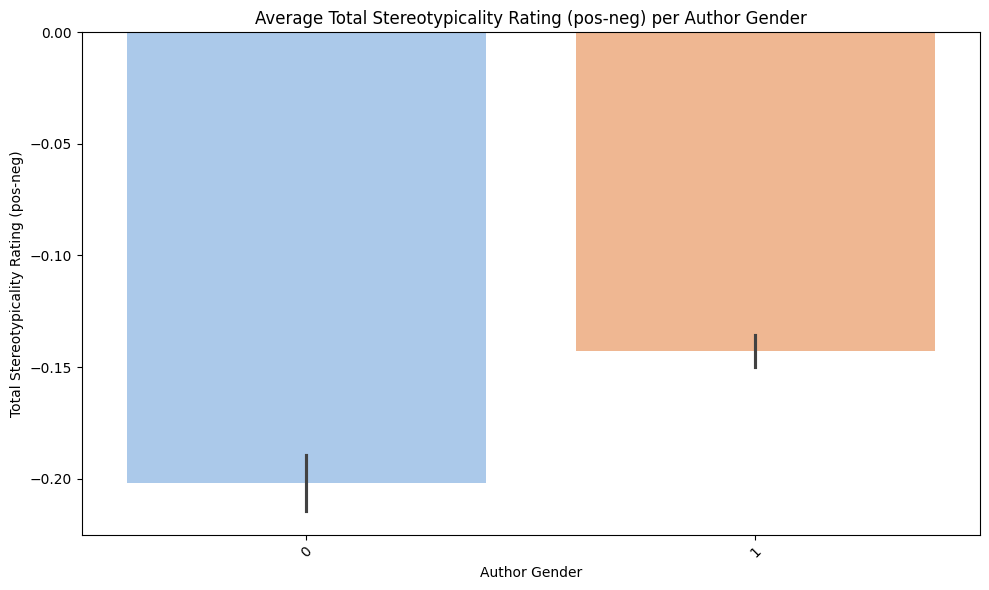

In [12]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            x='author_gender',
            y='diff_prop',
            palette='pastel',
            errorbar=('ci', 95))  

plt.title("Average Total Stereotypicality Rating (pos-neg) per Author Gender")
plt.xticks(rotation=45)
plt.ylabel("Total Stereotypicality Rating (pos-neg)")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/158800398.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_contemp.groupby('master_genre')['diff_prop'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/158800398.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_contemp,


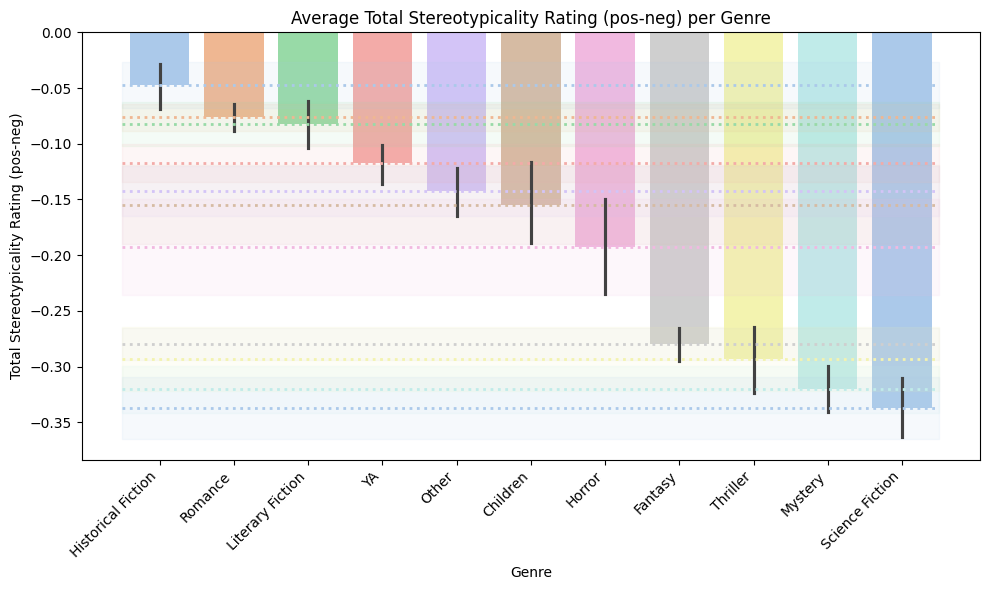

In [151]:
# Genre - total - plot
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Calculate means and confidence intervals per group
summary = df_contemp.groupby('master_genre')['diff_prop'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_contemp, 
                      x='master_genre', 
                      y='diff_prop', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # add tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal lines with matching colors
for _, row in summary.iterrows():
    genre = row['master_genre']
    y = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    plt.hlines(y=y, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dotted', linewidth=2)
    plt.fill_betweenx([y - ci, y + ci], -0.5, len(summary)-0.5, color=color, alpha=0.1)

plt.title("Average Total Stereotypicality Rating (pos-neg) per Genre")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Total Stereotypicality Rating (pos-neg)")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

* can't annotate letters, too complex - just give table 
* say something like 
    These genres tend to have higher diff_prop scores compared to many others:

    Fantasy ✨:
    Significantly higher than Children, Historical Fiction, Horror, Science Fiction, etc.
    Romance 💌:
    Higher than Science Fiction, Thriller, Mystery, Other.
    YA (Young Adult) 📚:
    Often higher than Children, Historical Fiction, Science Fiction, Thriller.

In [78]:
# Genre - total - significance test 

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df_contemp[['master_genre', 'diff_prop']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['diff_prop'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy  -0.1256 0.0001  -0.209 -0.0421   True
          Children Historical Fiction   0.1073 0.0028  0.0214  0.1932   True
          Children             Horror  -0.0381 0.9822 -0.1398  0.0637  False
          Children   Literary Fiction    0.072 0.2169  -0.015  0.1589  False
          Children            Mystery  -0.1659    0.0 -0.2521 -0.0798   True
          Children              Other    0.012    1.0 -0.0748  0.0989  False
          Children            Romance   0.0781 0.0805 -0.0042  0.1604  False
          Children    Science Fiction  -0.1829    0.0 -0.2744 -0.0913   True
          Children           Thriller  -0.1383    0.0 -0.2265 -0.0502   True
          Children                 YA    0.037 0.9565 -0.0502  0.1242  False

In [19]:
# Fit linear regression with interaction term 
model_a_g_i = smf.ols('diff_prop ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_prop   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     59.08
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.31e-237
Time:                        14:59:45   Log-Likelihood:                -4660.7
No. Observations:               12631   AIC:                             9365.
Df Residuals:                   12609   BIC:                             9529.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Now, author gender (and genre, but that's already hard to interpret anyway), are not the overall main effects, but specific conditional effects:

- author gender: the coefficient now represents the effect **only within the reference genre**  
- Same for genre: it now means the genre’s effect **only for the baseline gender**.

In [132]:
model_mei = smf.ols('diff_prop ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()
anova_model_mei = anova_lm(model_mei, typ=3)
print(anova_model_mei)

                                       sum_sq       df          F  \
Intercept                            2.209028      1.0  18.006177   
C(author_gender)                     0.271952      1.0   2.216727   
C(master_genre)                     45.623945     10.0  37.188878   
C(author_gender):C(master_genre)     8.815969     10.0   7.186051   
Residual                          1546.893451  12609.0        NaN   

                                        PR(>F)  
Intercept                         2.217632e-05  
C(author_gender)                  1.365472e-01  
C(master_genre)                   1.175597e-72  
C(author_gender):C(master_genre)  2.099367e-11  
Residual                                   NaN  


Author gender (p = 0.2007) does not have a main effect, when marginalized over genres.
Genre has a significant main effect, when averaged over genders.
There is a significant interaction, meaning the effect of gender depends on the genre.

In [22]:
# F-test to see if gender-genre-interaction is overall significant
f_test_i = anova_lm(model_a_g, model_a_g_i)
print(f_test_i)

   df_resid          ssr  df_diff   ss_diff         F        Pr(>F)
0   12619.0  1555.709420      0.0       NaN       NaN           NaN
1   12609.0  1546.893451     10.0  8.815969  7.186051  2.099367e-11


Difference is significant -> including interaction between author gender and genre significantly improves model fit beyond author gender and genre alone.

**Together, this suggests that the relationship between author gender and the outcome variable (total_sum) differs by genre — in other words, the effect of gender is not consistent across genres. This highlights the importance of modeling the interaction to capture how genre moderates the influence of author gender.**

In [65]:
# Interaction - Total - gender per genre plot

# Step 1: Create the grid of combinations
predict_df_total = pd.DataFrame(
    [(g, m) for g in df_contemp['author_gender'].unique()
            for m in df_contemp['master_genre'].unique()],
    columns=['author_gender', 'master_genre']
)

# Step 2: Match the dtypes to the training data
predict_df_total['author_gender'] = predict_df_total['author_gender'].astype(df_contemp['author_gender'].dtype)
predict_df_total['master_genre'] = predict_df_total['master_genre'].astype(df_contemp['master_genre'].dtype)

# Step 3: Make predictions
predict_df_total['diff_prop'] = model_a_g_i.predict(predict_df_total)

print(predict_df_total)

   author_gender        master_genre  diff_prop
0              1  Historical Fiction  -0.037362
1              1    Literary Fiction  -0.075624
2              1             Mystery  -0.341817
3              1                  YA  -0.114702
4              1            Children  -0.135172
5              1               Other  -0.115083
6              1             Romance  -0.077388
7              1     Science Fiction  -0.240048
8              1             Fantasy  -0.256469
9              1            Thriller  -0.263927
10             1              Horror  -0.197594
11             0  Historical Fiction  -0.075683
12             0    Literary Fiction  -0.093600
13             0             Mystery  -0.271568
14             0                  YA  -0.132382
15             0            Children  -0.224065
16             0               Other  -0.206967
17             0             Romance  -0.059058
18             0     Science Fiction  -0.432630
19             0             Fantasy  -0

### Genre differences within one gender?

#### Genre with lowest score - men

In [105]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_clean = df_contemp[['master_genre', 'author_gender', 'diff_prop']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['diff_prop'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

print(tukey.summary())


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy  -0.1081 0.9342 -0.3043   0.088  False
          0_Children 0_Historical Fiction   0.1484 0.5255  -0.054  0.3508  False
          0_Children             0_Horror   0.0342    1.0 -0.1749  0.2434  False
          0_Children   0_Literary Fiction   0.1305  0.747 -0.0693  0.3303  False
          0_Children            0_Mystery  -0.0475    1.0 -0.2485  0.1535  False
          0_Children              0_Other   0.0171    1.0 -0.1854  0.2196  False
          0_Children            0_Romance    0.165 0.4214 -0.0493  0.3793  False
          0_Children    0_Science Fiction  -0.2086 0.0348 -0.4111 -0.0061   True
          0_Children           0_Thriller  -0.0869 0.9947 -0.2841  0.1103  False
          0_Children        

In [106]:
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0_Children,0_Fantasy,-0.1081,0.9342,-0.3043,0.0880,False
1,0_Children,0_Historical Fiction,0.1484,0.5255,-0.0540,0.3508,False
2,0_Children,0_Horror,0.0342,1.0000,-0.1749,0.2434,False
3,0_Children,0_Literary Fiction,0.1305,0.7470,-0.0693,0.3303,False
4,0_Children,0_Mystery,-0.0475,1.0000,-0.2485,0.1535,False
...,...,...,...,...,...,...,...
226,1_Romance,1_Thriller,-0.1865,0.0000,-0.2583,-0.1147,True
227,1_Romance,1_YA,-0.0373,0.4551,-0.0865,0.0119,False
228,1_Science Fiction,1_Thriller,-0.0239,1.0000,-0.1224,0.0746,False
229,1_Science Fiction,1_YA,0.1253,0.0000,0.0418,0.2088,True


In [112]:
# Compare within men if one genre is higher/lower than the others
male_only_comparisons = tukey_df[
    (tukey_df['group1'].str[0] == '0') &  # group1 is male
    (tukey_df['group2'].str[0] == '0') &  # group2 is also male
    (tukey_df['group1'] != tukey_df['group2']) &  # not the same genre
    (tukey_df['reject'] == True)  # significant difference
].copy()

print(male_only_comparisons)

                   group1                group2  meandiff   p-adj   lower  \
7              0_Children     0_Science Fiction   -0.2086  0.0348 -0.4111   
21              0_Fantasy  0_Historical Fiction    0.2565  0.0000  0.1703   
22              0_Fantasy              0_Horror    0.1424  0.0001  0.0414   
23              0_Fantasy    0_Literary Fiction    0.2386  0.0000  0.1588   
25              0_Fantasy               0_Other    0.1252  0.0000  0.0389   
26              0_Fantasy             0_Romance    0.2732  0.0000  0.1619   
27              0_Fantasy     0_Science Fiction   -0.1004  0.0057 -0.1868   
29              0_Fantasy                  0_YA    0.1998  0.0000  0.0892   
41   0_Historical Fiction              0_Horror   -0.1142  0.0427 -0.2268   
43   0_Historical Fiction             0_Mystery   -0.1959  0.0000 -0.2926   
44   0_Historical Fiction               0_Other   -0.1313  0.0005 -0.2311   
46   0_Historical Fiction     0_Science Fiction   -0.3569  0.0000 -0.4568   

In [115]:
# Genre you want to test
target_genre = "0_Science Fiction"

# Filter to comparisons where target genre is one of the two
sf_comparisons = tukey_df[
    ((tukey_df['group1'] == target_genre) | (tukey_df['group2'] == target_genre)) &
    (tukey_df['reject'] == True)
]

# Check if in all those comparisons, target_genre has the lower value
def is_target_lower(row):
    if row['group1'] == target_genre:
        return row['meandiff'] > 0
    elif row['group2'] == target_genre:
        return row['meandiff'] < 0 
    return False

# Apply the check
sf_comparisons['target_is_lower'] = sf_comparisons.apply(is_target_lower, axis=1)

# Final check: was it *always* significantly lower?
is_lowest = sf_comparisons['target_is_lower'].all()
print("Is", target_genre, "significantly lower than all others?", is_lowest)

Is 0_Science Fiction significantly lower than all others? True


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/957212512.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_comparisons['target_is_lower'] = sf_comparisons.apply(is_target_lower, axis=1)


#### Genre with highest score - men

In [125]:
# Genre you want to test
target_genre = "0_Romance"

# Filter to comparisons where target genre is one of the two
r_comparisons = tukey_df[
    ((tukey_df['group1'] == target_genre) | (tukey_df['group2'] == target_genre)) &
    (tukey_df['reject'] == True)
]

# Check if in all those comparisons, target_genre has the lower value
def is_target_higher(row):
    if row['group1'] == target_genre:
        return row['meandiff'] < 0
    elif row['group2'] == target_genre:
        return row['meandiff'] > 0 
    return False

# Apply the check
r_comparisons['target_is_higher'] = r_comparisons.apply(is_target_higher, axis=1)

# Final check: was it *always* significantly lower?
is_highest = r_comparisons['target_is_higher'].all()
print("Is", target_genre, "significantly higher than all others?", is_highest)

Is 0_Romance significantly higher than all others? True


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2685850229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_comparisons['target_is_higher'] = r_comparisons.apply(is_target_higher, axis=1)


#### Genre with lowest score - women

In [117]:
# Compare within men if one genre is higher/lower than the others
female_only_comparisons = tukey_df[
    (tukey_df['group1'].str[0] == '1') &  # group1 is female
    (tukey_df['group2'].str[0] == '1') &  # group2 is also female
    (tukey_df['group1'] != tukey_df['group2']) &  # not the same genre
    (tukey_df['reject'] == True)  # significant difference
].copy()

print(female_only_comparisons)

                   group1                group2  meandiff   p-adj   lower  \
176            1_Children             1_Fantasy   -0.1213  0.0069 -0.2269   
180            1_Children             1_Mystery   -0.2066  0.0000 -0.3159   
184            1_Children            1_Thriller   -0.1288  0.0223 -0.2497   
186             1_Fantasy  1_Historical Fiction    0.2191  0.0000  0.1658   
188             1_Fantasy    1_Literary Fiction    0.1808  0.0000  0.1209   
189             1_Fantasy             1_Mystery   -0.0853  0.0000 -0.1404   
190             1_Fantasy               1_Other    0.1414  0.0000  0.0844   
191             1_Fantasy             1_Romance    0.1791  0.0000  0.1381   
194             1_Fantasy                  1_YA    0.1418  0.0000  0.0872   
195  1_Historical Fiction              1_Horror   -0.1602  0.0009 -0.2852   
197  1_Historical Fiction             1_Mystery   -0.3045  0.0000 -0.3648   
198  1_Historical Fiction               1_Other   -0.0777  0.0014 -0.1398   

In [118]:
# Genre you want to test
target_genre = "1_Mystery"

# Filter to comparisons where target genre is one of the two
m_comparisons = tukey_df[
    ((tukey_df['group1'] == target_genre) | (tukey_df['group2'] == target_genre)) &
    (tukey_df['reject'] == True)
]

# Check if in all those comparisons, target_genre has the lower value
def is_target_lower(row):
    if row['group1'] == target_genre:
        return row['meandiff'] > 0
    elif row['group2'] == target_genre:
        return row['meandiff'] < 0 
    return False

# Apply the check
m_comparisons['target_is_lower'] = m_comparisons.apply(is_target_lower, axis=1)

# Final check: was it *always* significantly lower?
is_lowest = m_comparisons['target_is_lower'].all()
print("Is", target_genre, "significantly lower than all others?", is_lowest)

Is 1_Mystery significantly lower than all others? False


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/697903824.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_comparisons['target_is_lower'] = m_comparisons.apply(is_target_lower, axis=1)


* Mystery is significantly lower than all other genres except for Sci-Fi 
* Is Sci-Fi higher than all others (except for mystery)?

In [123]:
# Genre you want to test
target_genre = "1_Science Fiction"

# Filter to comparisons where target genre is one of the two
sf_comparisons = tukey_df[
    ((tukey_df['group1'] == target_genre) | (tukey_df['group2'] == target_genre)) &
    (tukey_df['reject'] == True)
]

# Check if in all those comparisons, target_genre has the lower value
def is_target_lower(row):
    if row['group1'] == target_genre:
        return row['meandiff'] > 0
    elif row['group2'] == target_genre:
        return row['meandiff'] < 0 
    return False

# Apply the check
sf_comparisons['target_is_lower'] = sf_comparisons.apply(is_target_lower, axis=1)

# Final check: was it *always* significantly lower?
is_lowest = sf_comparisons['target_is_lower'].all()
print("Is", target_genre, "significantly lower than all others?", is_lowest)

Is 1_Science Fiction significantly lower than all others? False


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2607920344.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_comparisons['target_is_lower'] = sf_comparisons.apply(is_target_lower, axis=1)


In [124]:
sf_comparisons

,group1,group2,meandiff,p-adj,lower,upper,reject,target_is_lower
38,0_Fantasy,1_Science Fiction,0.0922,0.0241,0.0051,0.1792,True,False
57,0_Historical Fiction,1_Science Fiction,-0.1644,0.0000,-0.2648,-0.0640,True,True
92,0_Literary Fiction,1_Science Fiction,-0.1464,0.0000,-0.2414,-0.0515,True,True
137,0_Romance,1_Science Fiction,-0.1810,0.0000,-0.3035,-0.0585,True,True
150,0_Science Fiction,1_Science Fiction,0.1926,0.0000,0.0920,0.2931,True,False
200,1_Historical Fiction,1_Science Fiction,-0.2027,0.0000,-0.2853,-0.1200,True,True
213,1_Literary Fiction,1_Science Fiction,-0.1644,0.0000,-0.2515,-0.0773,True,True
218,1_Mystery,1_Science Fiction,0.1018,0.0026,0.0179,0.1856,True,False
222,1_Other,1_Science Fiction,-0.1250,0.0000,-0.2100,-0.0399,True,True
225,1_Romance,1_Science Fiction,-0.1627,0.0000,-0.2380,-0.0873,True,True


* yes, so Sci-Fi and Mystery are the lowest

#### Genre with highest score - women

In [126]:
# Genre you want to test
target_genre = "1_Historical_Fiction"

# Filter to comparisons where target genre is one of the two
hf_comparisons = tukey_df[
    ((tukey_df['group1'] == target_genre) | (tukey_df['group2'] == target_genre)) &
    (tukey_df['reject'] == True)
]

# Check if in all those comparisons, target_genre has the lower value
def is_target_higher(row):
    if row['group1'] == target_genre:
        return row['meandiff'] < 0
    elif row['group2'] == target_genre:
        return row['meandiff'] > 0 
    return False

# Apply the check
hf_comparisons['target_is_higher'] = hf_comparisons.apply(is_target_higher, axis=1)

# Final check: was it *always* significantly lower?
is_highest = hf_comparisons['target_is_higher'].all()
print("Is", target_genre, "significantly higher than all others?", is_highest)

Is 1_Historical_Fiction significantly higher than all others? True


### Genres with gender differences

In [ ]:
import pandas as pd

# Assuming tukey_df is your DataFrame
def split_group(group_label):
    gender, genre = group_label.split("_", 1)
    return int(gender), genre

# Apply to both group1 and group2
tukey_df[['gender1', 'genre1']] = tukey_df['group1'].apply(split_group).apply(pd.Series)
tukey_df[['gender2', 'genre2']] = tukey_df['group2'].apply(split_group).apply(pd.Series)

In [ ]:
# Filter for comparisons between the same genre but different genders
gender_diff = tukey_df[
    (tukey_df['genre1'] == tukey_df['genre2']) &
    (tukey_df['gender1'] != tukey_df['gender2']) &
    (tukey_df['reject'] == True)
]

# Genres with significant gender differences
genres_with_differences = gender_diff['genre1'].unique().tolist()

# Genres with NO significant gender differences
all_genres = sorted(set(tukey_df['genre1']) | set(tukey_df['genre2']))
genres_without_differences = [g for g in all_genres if g not in genres_with_differences]

In [99]:
genres_without_differences

['Children',
 'Historical Fiction',
 'Horror',
 'Literary Fiction',
 'Mystery',
 'Romance',
 'Thriller',
 'YA']

so significant: 
* Fantasy
* Other
* Science Fiction

put stars on the ones where male and female scores differ significantly 

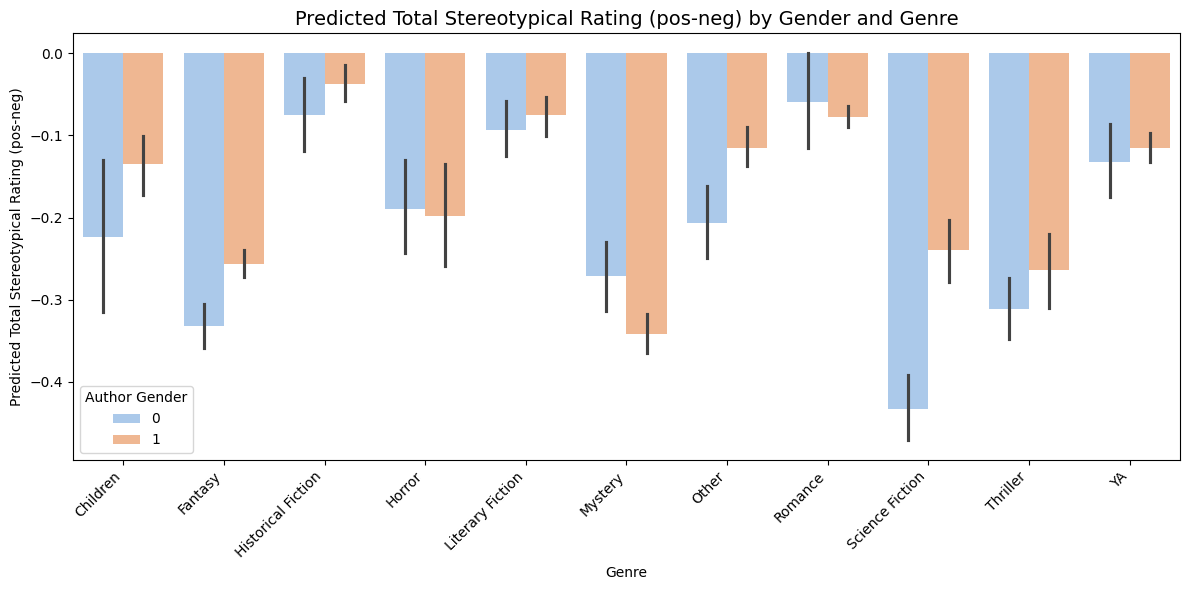

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_contemp,
    x='master_genre',
    y='diff_prop',
    hue='author_gender',
    palette='pastel',
    errorbar=('ci', 95),
)

plt.xticks(rotation=45, ha='right')
plt.title("Predicted Total Stereotypical Rating (pos-neg) by Gender and Genre", fontsize=14)
plt.ylabel("Predicted Total Stereotypical Rating (pos-neg)")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()


## Stereotypical Items

In [23]:
# Fit the linear regression model
model_a_pos = smf.ols('prop_pos ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.11e-25
Time:                        15:02:19   Log-Likelihood:                 2333.3
No. Observations:               12728   AIC:                            -4663.
Df Residuals:                   12726   BIC:                            -4648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3133      0

Women write significantly more stereotypical than men. 

In [24]:
model_a_g_pos = smf.ols('prop_pos ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     54.60
Date:                Mon, 26 May 2025   Prob (F-statistic):          8.23e-119
Time:                        15:03:15   Log-Likelihood:                 2572.1
No. Observations:               12728   AIC:                            -5120.
Df Residuals:                   12716   BIC:                            -5031.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [25]:
# F-test to see if genre has an overall significant effect
f_test_pos = anova_lm(model_a_pos, model_a_g_pos)
print(f_test_pos)

   df_resid         ssr  df_diff    ss_diff          F        Pr(>F)
0   12726.0  516.482810      0.0        NaN        NaN           NaN
1   12716.0  497.460631     10.0  19.022179  48.624155  3.079160e-96


Both author gender and genre significant. 

In [26]:
# Fit linear regression with interaction term 
model_a_g_i_pos = smf.ols('prop_pos ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     32.72
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.32e-128
Time:                        15:04:13   Log-Likelihood:                 2613.6
No. Observations:               12728   AIC:                            -5183.
Df Residuals:                   12706   BIC:                            -5019.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [27]:
model_me_pos = smf.ols('prop_pos ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()

anova_model_me_pos = anova_lm(model_me_pos, typ=3)
print(anova_model_me_pos)

                                      sum_sq       df          F        PR(>F)
Intercept                           1.764541      1.0  45.364117  1.706495e-11
C(author_gender)                    0.069477      1.0   1.786175  1.814168e-01
C(master_genre)                     4.309244     10.0  11.078524  4.556968e-19
C(author_gender):C(master_genre)    3.231831     10.0   8.308630  1.389047e-13
Residual                          494.228800  12706.0        NaN           NaN


When including interaction term: 
* author gender main effect ns
* genre main effect sig
* interaction sig


### Predictions per Group

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1142182798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_contemp, x='author_gender', y='prop_pos', palette='pastel', errorbar=('ci', 95))


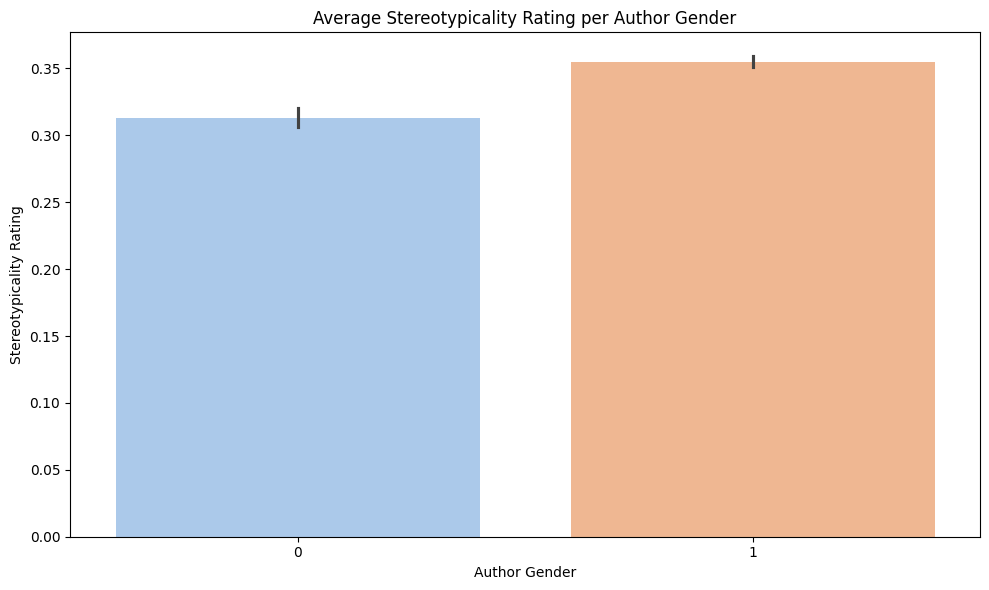

In [152]:
# Gender only - prop_pos - plot

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_contemp, x='author_gender', y='prop_pos', palette='pastel', errorbar=('ci', 95))

plt.title("Average Stereotypicality Rating per Author Gender")
plt.ylabel("Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

In [153]:
df_contemp.groupby('author_gender')['prop_pos'].mean()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/12830605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_contemp.groupby('author_gender')['prop_pos'].mean()


author_gender
0    0.313301
1    0.355161
Name: prop_pos, dtype: float64

In [42]:
# Gender only - prop_pos - significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['author_gender', 'prop_pos']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['author_gender'],
                          alpha=0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.034   0.0 0.0268 0.0413   True
-------------------------------------------------


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3654209285.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_contemp.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3654209285.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_contemp,


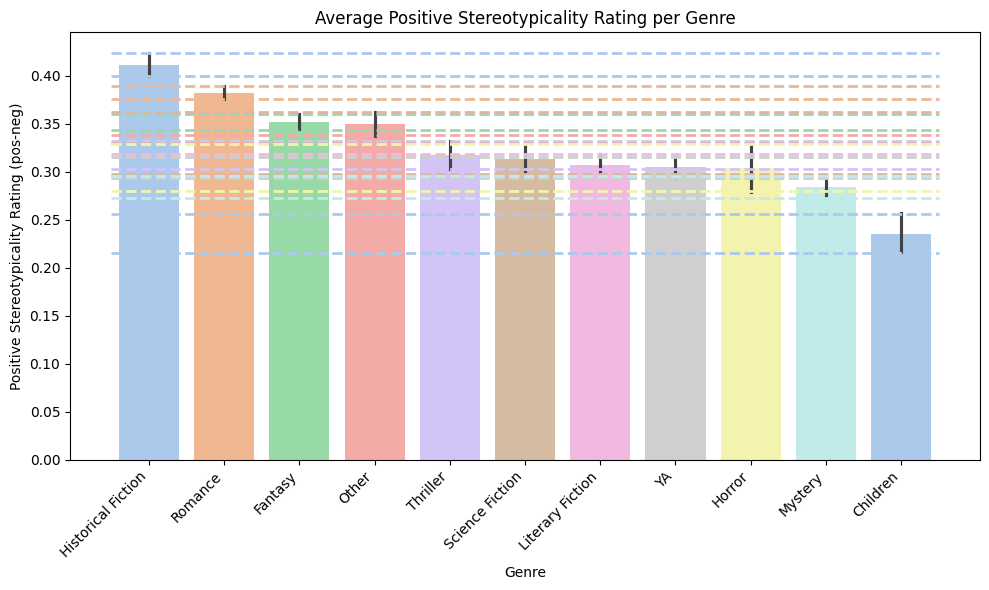

In [156]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Calculate means and confidence intervals per group
summary = df_contemp.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_contemp, 
                      x='master_genre', 
                      y='prop_pos', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Positive Stereotypicality Rating per Genre")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Positive Stereotypicality Rating (pos-neg)")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


General idea: 
only describe what's significantly the highest and lowest visually and provide table with all pairwise comparisons as online material 

* historical fiction and romance highest
* Children lowest

In [39]:
# Genre only - prop_pos_ significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['master_genre', 'prop_pos']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy   0.0888    0.0    0.05  0.1276   True
          Children Historical Fiction   0.1553    0.0  0.1152  0.1954   True
          Children             Horror   0.0533 0.0247  0.0034  0.1031   True
          Children   Literary Fiction   0.0485 0.0047  0.0084  0.0885   True
          Children            Mystery   0.0244 0.6873  -0.016  0.0647  False
          Children              Other   0.0868    0.0   0.046  0.1276   True
          Children            Romance   0.1213    0.0  0.0832  0.1594   True
          Children    Science Fiction   0.0541 0.0029  0.0107  0.0975   True
          Children           Thriller   0.0569 0.0006   0.015  0.0987   True
          Children                 YA    0.042 0.0423  0.0007  0.0834   True

In [ ]:
# Interaction - prop_pos - plot

# Step 1: Create the grid of combinations
predict_df_pos = pd.DataFrame(
    [(g, m) for g in df_contemp['author_gender'].unique()
            for m in df_contemp['master_genre'].unique()],
    columns=['author_gender', 'master_genre']
)

# Step 2: Match the dtypes to the training data
predict_df_pos['author_gender'] = predict_df_pos['author_gender'].astype(df_contemp['author_gender'].dtype)
predict_df_pos['master_genre'] = predict_df_pos['master_genre'].astype(df_contemp['master_genre'].dtype)

# Step 3: Make predictions
predict_df_pos['prop_pos'] = model_a_g_i_pos.predict(predict_df_pos)

In [34]:
print(predict_df_pos)

   author_gender        master_genre  prop_pos
0              1  Historical Fiction  0.415166
1              1    Literary Fiction  0.315437
2              1             Mystery  0.274595
3              1                  YA  0.308506
4              1            Children  0.245188
5              1               Other  0.374102
6              1             Romance  0.386316
7              1     Science Fiction  0.358311
8              1             Fantasy  0.365579
9              1            Thriller  0.301545
10             1              Horror  0.306389
11             0  Historical Fiction  0.401158
12             0    Literary Fiction  0.294321
13             0             Mystery  0.305723
14             0                  YA  0.283467
15             0            Children  0.200258
16             0               Other  0.293261
17             0             Romance  0.313169
18             0     Science Fiction  0.271251
19             0             Fantasy  0.322356
20           

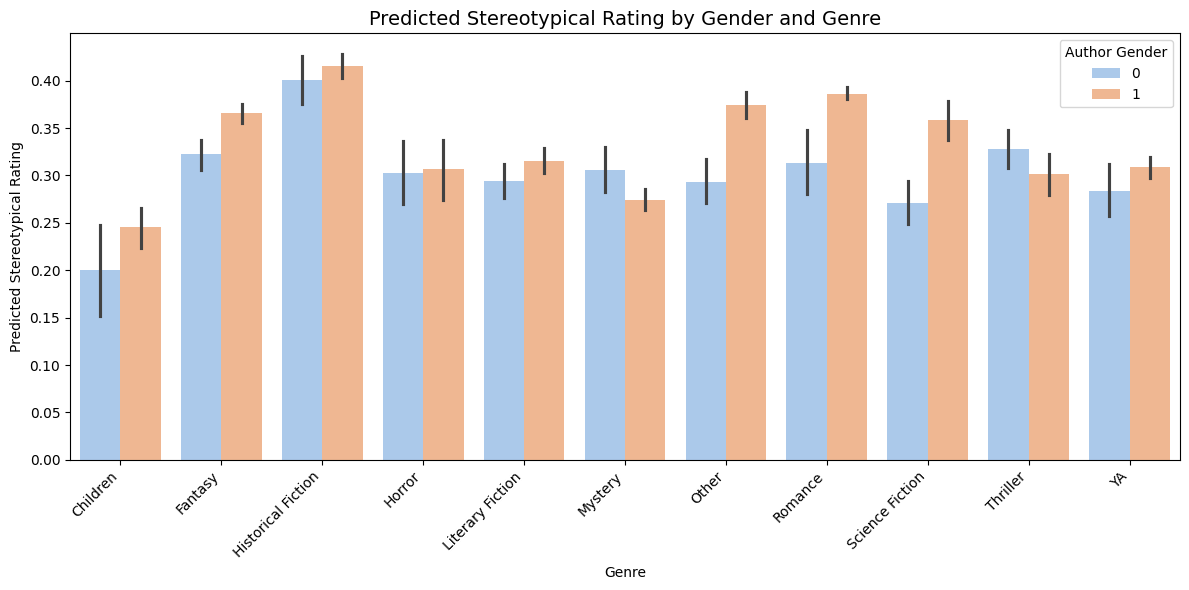

In [157]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contemp, 
            x='master_genre', 
            y='prop_pos', 
            hue='author_gender', 
            palette='pastel',
            errorbar= ('ci', 95))

plt.xticks(rotation=45, ha='right')
plt.title("Predicted Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("Predicted Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

In [164]:
# put stars for significant differences

In [163]:
# Interaction - prop_pos - gender per genre significance test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_clean = df_contemp[['master_genre', 'author_gender', 'prop_pos']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

print(tukey.summary())

/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.1221 0.0128  0.0117  0.2325   True
          0_Children 0_Historical Fiction   0.2009    0.0  0.0871  0.3147   True
          0_Children             0_Horror   0.1025 0.1914 -0.0151  0.2201  False
          0_Children   0_Literary Fiction   0.0941 0.2593 -0.0184  0.2065  False
          0_Children            0_Mystery   0.1055 0.1057 -0.0076  0.2185  False
          0_Children              0_Other    0.093  0.305  -0.021   0.207  False
          0_Children            0_Romance   0.1129 0.1011 -0.0076  0.2334  False
          0_Children    0_Science Fiction    0.071  0.815 -0.0428  0.1848  False
          0_Children           0_Thriller   0.1276 0.0069  0.0166  0.2385   True
          0_Children        

### Genre differences within one gender?

In [168]:
# Significance Test
df_clean = df_contemp[['master_genre', 'author_gender', 'prop_pos']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['interaction'],
                          alpha=0.05)
print(tukey.summary())

/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.1221 0.0128  0.0117  0.2325   True
          0_Children 0_Historical Fiction   0.2009    0.0  0.0871  0.3147   True
          0_Children             0_Horror   0.1025 0.1914 -0.0151  0.2201  False
          0_Children   0_Literary Fiction   0.0941 0.2593 -0.0184  0.2065  False
          0_Children            0_Mystery   0.1055 0.1057 -0.0076  0.2185  False
          0_Children              0_Other    0.093  0.305  -0.021   0.207  False
          0_Children            0_Romance   0.1129 0.1011 -0.0076  0.2334  False
          0_Children    0_Science Fiction    0.071  0.815 -0.0428  0.1848  False
          0_Children           0_Thriller   0.1276 0.0069  0.0166  0.2385   True
          0_Children        

#### Men

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1623065971.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_male.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1623065971.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_male,


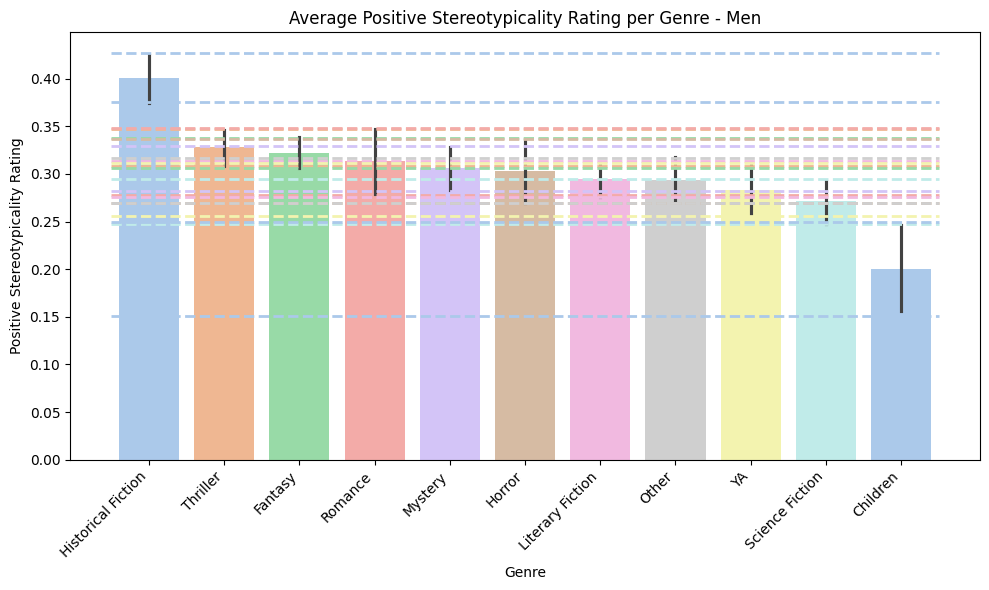

In [167]:
df_male = df_contemp[df_contemp['author_gender'] == 0]

# Calculate means and confidence intervals per group
summary = df_male.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_male, 
                      x='master_genre', 
                      y='prop_pos', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Positive Stereotypicality Rating per Genre - Men")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Positive Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: historical fiction
* lowest: children

-> write it down like this, show plot, say 'as can be seen in the plot', say that complete table is available online

#### Women

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/596971486.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_female.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/596971486.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_female,


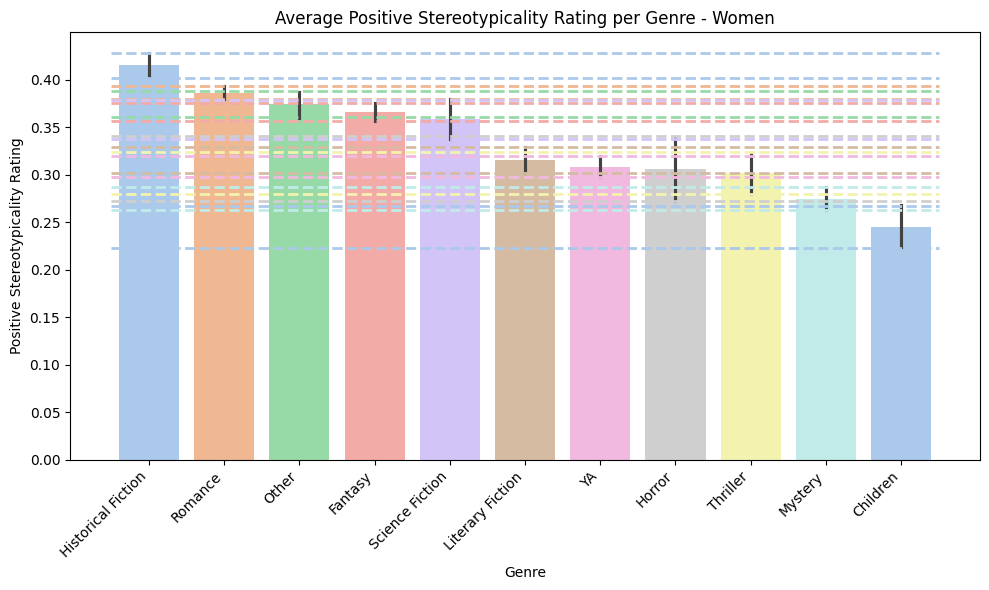

In [169]:
df_female = df_contemp[df_contemp['author_gender'] == 1]

# Calculate means and confidence intervals per group
summary = df_female.groupby('master_genre')['prop_pos'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_female, 
                      x='master_genre', 
                      y='prop_pos', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Positive Stereotypicality Rating per Genre - Women")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Positive Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: historical fiction
* lowest: children (ns against mystery, which is the second lowest, but against all the rest)

-> write it down like this, show plot, say 'as can be seen in the plot', say that complete table is available online

## Anti-Stereotypical Items

In [48]:
# Fit the linear regression model
model_a_neg = smf.ols('prop_neg ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     80.81
Date:                Mon, 26 May 2025   Prob (F-statistic):           2.83e-19
Time:                        15:55:57   Log-Likelihood:                -450.96
No. Observations:               12666   AIC:                             905.9
Df Residuals:                   12664   BIC:                             920.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5452      0

In [49]:
model_a_g_neg = smf.ols('prop_neg ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:12   Log-Likelihood:                 341.06
No. Observations:               12666   AIC:                            -658.1
Df Residuals:                   12654   BIC:                            -568.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [50]:
# F-test to see if genre has an overall significant effect
f_test_neg = anova_lm(model_a_neg, model_a_g_neg)
print(f_test_neg)

   df_resid         ssr  df_diff    ss_diff           F  Pr(>F)
0   12664.0  796.324745      0.0        NaN         NaN     NaN
1   12654.0  702.710494     10.0  93.614251  168.575075     0.0


In [51]:
# Fit linear regression with interaction term 
model_a_g_i_neg = smf.ols('prop_neg ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     89.38
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:                 385.35
No. Observations:               12666   AIC:                            -726.7
Df Residuals:                   12644   BIC:                            -562.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [52]:
model_me_neg = smf.ols('prop_neg ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()
anova_model_me_neg = anova_lm(model_me_neg, typ=3)
print(anova_model_me_neg)

                                      sum_sq       df           F  \
Intercept                           7.922199      1.0  143.545874   
C(author_gender)                    0.066515      1.0    1.205210   
C(master_genre)                    41.471268     10.0   75.143649   
C(author_gender):C(master_genre)    4.896749     10.0    8.872639   
Residual                          697.813745  12644.0         NaN   

                                         PR(>F)  
Intercept                          6.728731e-33  
C(author_gender)                   2.723038e-01  
C(master_genre)                   2.073331e-150  
C(author_gender):C(master_genre)   1.089011e-14  
Residual                                    NaN  


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4113269884.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_contemp.groupby('author_gender')['prop_neg'].mean())


author_gender
0    0.545205
1    0.500449
Name: prop_neg, dtype: float64


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4113269884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_contemp, x='author_gender', y='prop_neg', palette='pastel', errorbar=('ci', 95))


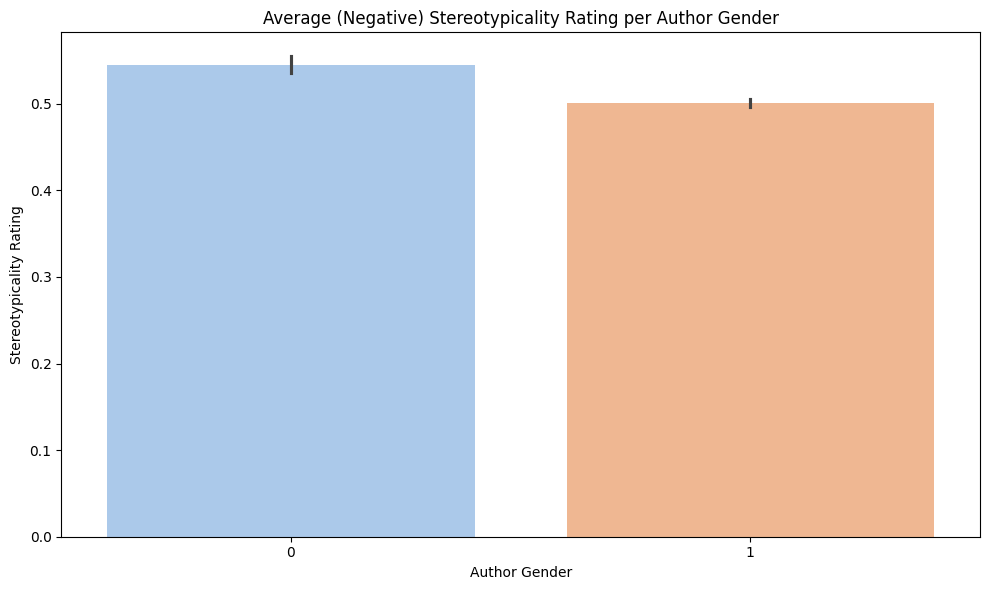

In [170]:
# Gender only - prop_pos - plot
print(df_contemp.groupby('author_gender')['prop_neg'].mean())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_contemp, x='author_gender', y='prop_neg', palette='pastel', errorbar=('ci', 95))

plt.title("Average (Negative) Stereotypicality Rating per Author Gender")
plt.ylabel("Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2201356938.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_contemp.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2201356938.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_contemp,


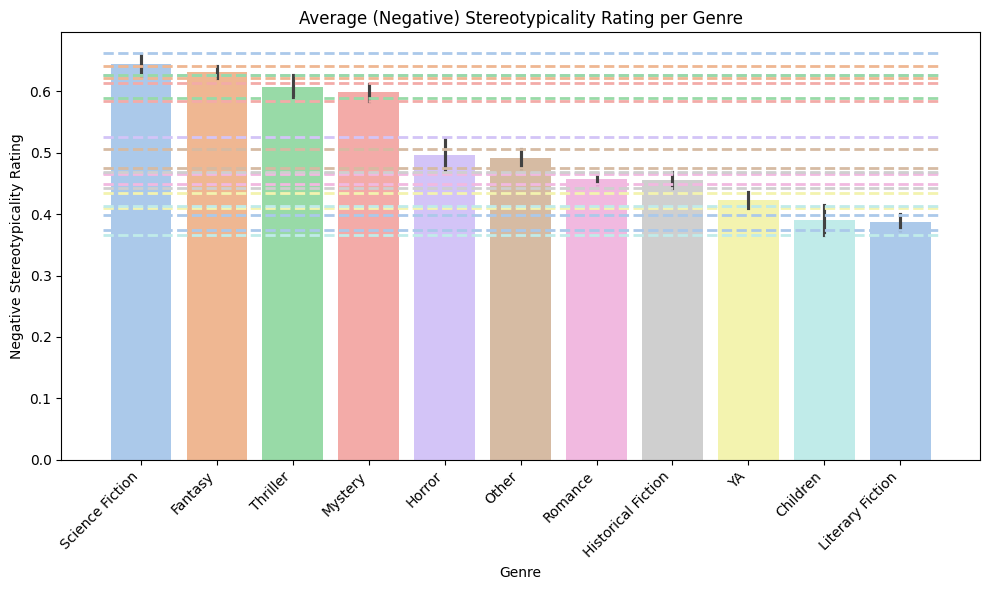

In [173]:
# Calculate means and confidence intervals per group
summary = df_contemp.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_contemp, 
                      x='master_genre', 
                      y='prop_neg', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average (Negative) Stereotypicality Rating per Genre")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Negative Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* science fiction, fantasy, thriller, and mystery highest
* YA, children, literary fiction lowest

In [174]:
# Genre - prop_neg - significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df_contemp[['master_genre', 'prop_neg']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy    0.241    0.0  0.1851   0.297   True
          Children Historical Fiction   0.0657 0.0109  0.0081  0.1232   True
          Children             Horror   0.1059    0.0  0.0377   0.174   True
          Children   Literary Fiction  -0.0035    1.0 -0.0618  0.0548  False
          Children            Mystery   0.2086    0.0  0.1509  0.2663   True
          Children              Other   0.1007    0.0  0.0424  0.1589   True
          Children            Romance   0.0675  0.004  0.0123  0.1226   True
          Children    Science Fiction   0.2544    0.0  0.1931  0.3158   True
          Children           Thriller   0.2177    0.0  0.1586  0.2768   True
          Children                 YA   0.0328 0.7756 -0.0256  0.0913  False

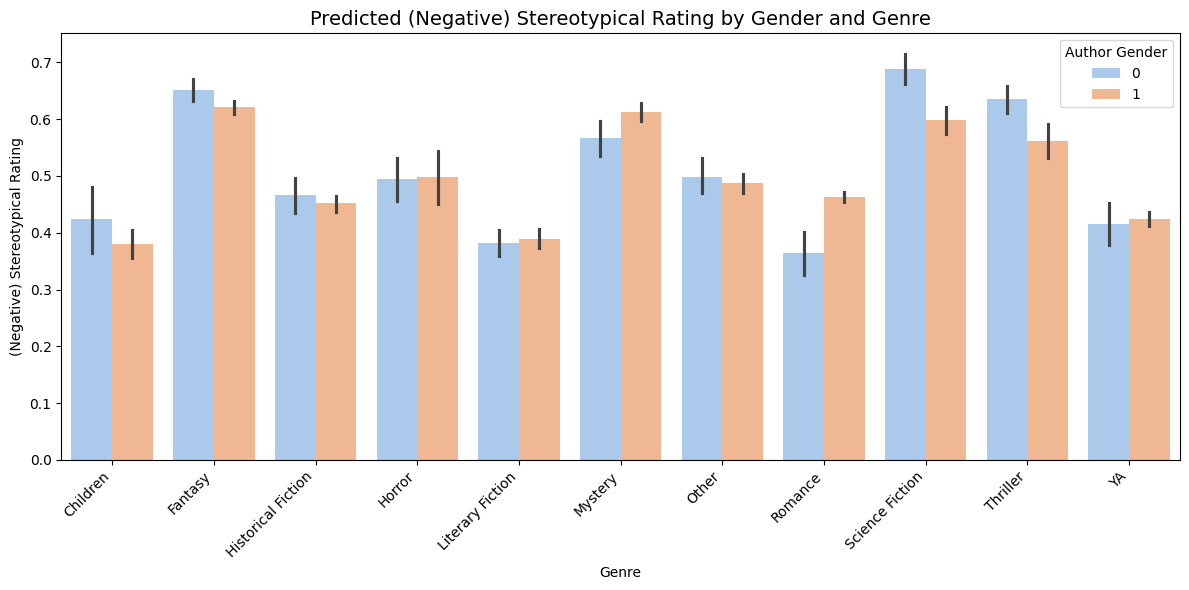

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contemp, 
            x='master_genre', 
            y='prop_neg', 
            hue='author_gender', 
            palette='pastel',
            errorbar= ('ci', 95))

plt.xticks(rotation=45, ha='right')
plt.title("Predicted (Negative) Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("(Negative) Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

Significant gender differences: 
* Romance
* Science Fiction
* Thriller

In [176]:
# Interaction - prop_neg - gender per genre significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_clean = df_contemp[['master_genre', 'author_gender', 'prop_neg']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['interaction'],
                          alpha=0.05)

print(tukey.summary())

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.2271    0.0  0.0955  0.3586   True
          0_Children 0_Historical Fiction   0.0419    1.0 -0.0937  0.1775  False
          0_Children             0_Horror   0.0703  0.975 -0.0699  0.2105  False
          0_Children   0_Literary Fiction  -0.0428    1.0 -0.1768  0.0912  False
          0_Children            0_Mystery   0.1418  0.026  0.0071  0.2765   True
          0_Children              0_Other   0.0746 0.9366 -0.0612  0.2104  False
          0_Children            0_Romance  -0.0607  0.997 -0.2044   0.083  False
          0_Children    0_Science Fiction   0.2646    0.0  0.1288  0.4003   True
          0_Children           0_Thriller   0.2119    0.0  0.0797  0.3442   True
          0_Children        

In [ ]:
# VALUES ARE WRONG (OLD DF), BUT MAYBE THIS FORMAT IS NICEST TO SHOW SIGNIFICANCE?

# # Interaction - prop_neg - gender per genre significance test

# from scipy.stats import ttest_ind

# # Create a list to store the results
# results = []

# for genre in df['master_genre'].unique():
#     # Subset the data for this genre
#     subset = df[df['master_genre'] == genre]
    
#     # Get prop_pos for each gender
#     men = subset[subset['author_gender'] == 0]['prop_neg'].dropna()
#     women = subset[subset['author_gender'] == 1]['prop_neg'].dropna()
    
#     # Perform t-test
#     t_stat, p_val = ttest_ind(men, women, equal_var=False)  # Welch's t-test is safer
    
#     # Store the result
#     results.append({
#         'genre': genre,
#         'mean_men': men.mean(),
#         'mean_women': women.mean(),
#         't_stat': t_stat,
#         'p_value': p_val,
#         'n_men': len(men),
#         'n_women': len(women)
#     })

# # Convert to DataFrame
# ttest_results = pd.DataFrame(results)

In [60]:
ttest_results

,genre,mean_men,mean_women,t_stat,p_value,n_men,n_women
0,Historical Fiction,0.429890,0.446903,-1.101647,2.710030e-01,433,980
1,Literary Fiction,0.372023,0.389710,-1.567974,1.171238e-01,667,743
2,Children,0.412190,0.361628,1.684803,9.647979e-02,54,251
3,Mystery,0.545110,0.603136,-3.526961,4.482552e-04,418,887
4,YA,0.415722,0.423221,-0.383035,7.020847e-01,166,874
5,Other,0.484866,0.485507,-0.038591,9.692283e-01,377,789
6,Romance,0.361493,0.461156,-6.281218,1.528923e-09,213,2896
7,Science Fiction,0.643693,0.595296,2.644603,8.359729e-03,387,324
8,Fantasy,0.637915,0.617463,1.918503,5.527002e-02,709,1457
9,Thriller,0.626218,0.560594,3.459422,5.712247e-04,584,353


### Genre differences within one gender?

In [178]:
# Significance Test
df_clean = df_contemp[['master_genre', 'author_gender', 'prop_neg']].dropna()

# Create interaction column
df_clean['interaction'] = df_clean['author_gender'].astype(str) + "_" + df_clean['master_genre'].astype(str)

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['interaction'],
                          alpha=0.05)
print(tukey.summary())

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          0_Children            0_Fantasy   0.2271    0.0  0.0955  0.3586   True
          0_Children 0_Historical Fiction   0.0419    1.0 -0.0937  0.1775  False
          0_Children             0_Horror   0.0703  0.975 -0.0699  0.2105  False
          0_Children   0_Literary Fiction  -0.0428    1.0 -0.1768  0.0912  False
          0_Children            0_Mystery   0.1418  0.026  0.0071  0.2765   True
          0_Children              0_Other   0.0746 0.9366 -0.0612  0.2104  False
          0_Children            0_Romance  -0.0607  0.997 -0.2044   0.083  False
          0_Children    0_Science Fiction   0.2646    0.0  0.1288  0.4003   True
          0_Children           0_Thriller   0.2119    0.0  0.0797  0.3442   True
          0_Children        

#### Men

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4216753756.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_male.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/4216753756.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_male,


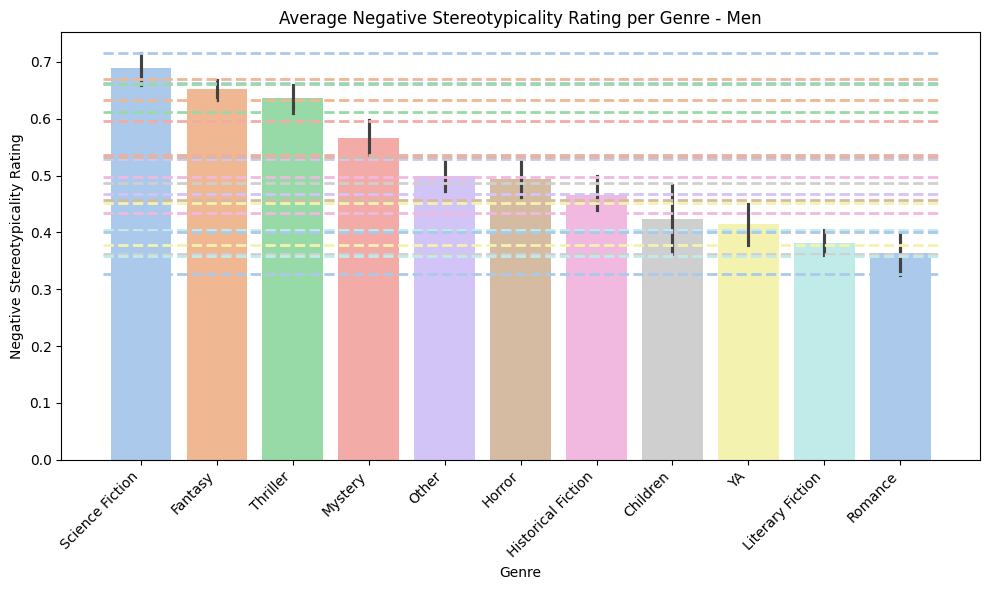

In [177]:
df_male = df_contemp[df_contemp['author_gender'] == 0]

# Calculate means and confidence intervals per group
summary = df_male.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_male, 
                      x='master_genre', 
                      y='prop_neg', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Negative Stereotypicality Rating per Genre - Men")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Negative Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: Science Fiction, Fantasy, Thriller
* lowest/lower ones: (Romance, Literary Fiction, YA)

#### Women

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3165160734.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_female.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3165160734.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_female,


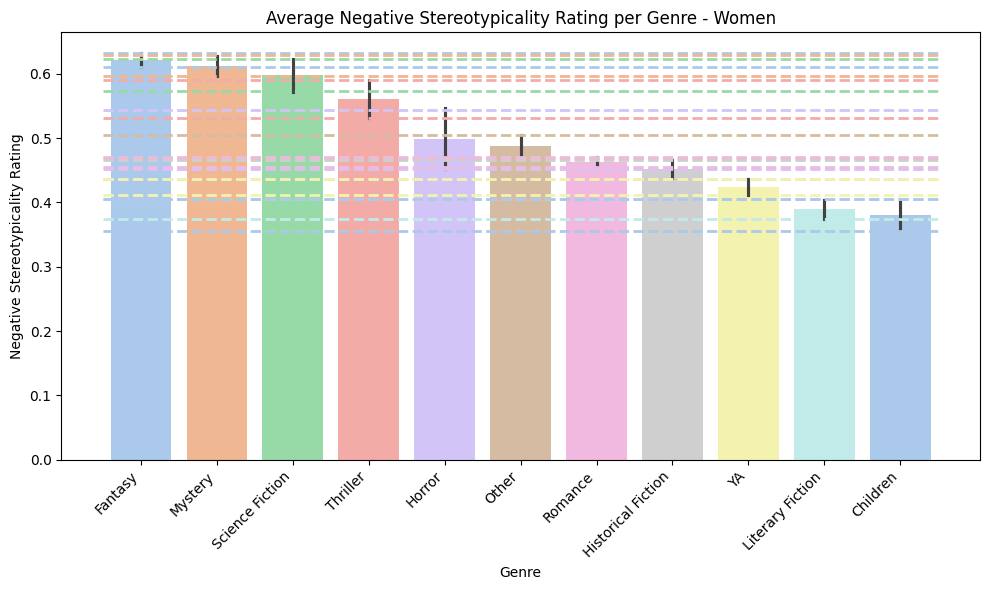

In [179]:
df_female = df_contemp[df_contemp['author_gender'] == 1]

# Calculate means and confidence intervals per group
summary = df_female.groupby('master_genre')['prop_neg'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / summary['count']**0.5
summary['ci95'] = summary['sem'] * stats.t.ppf(0.975, df=summary['count']-1)  # 95% CI

# Sort genres by mean for consistent ordering
summary = summary.sort_values('mean', ascending=False)
order = summary['master_genre']

plt.figure(figsize=(10, 6))

# Plot bars with seaborn, ordered by 'order'
barplot = sns.barplot(data=df_female, 
                      x='master_genre', 
                      y='prop_neg', 
                      order=order, 
                      palette='pastel', 
                      errorbar=('ci', 95))

# Map bar colors to genres
bar_colors = {}
for patch in barplot.patches:
    # x coordinate is the bar index
    x_pos = int(patch.get_x() + patch.get_width() / 2 + 0.001)  # tiny offset to avoid float issues
    bar_colors[order.iloc[x_pos]] = patch.get_facecolor()

# Draw horizontal mean lines and two dashed lines for CI bounds
for _, row in summary.iterrows():
    genre = row['master_genre']
    mean = row['mean']
    ci = row['ci95']
    color = bar_colors[genre]
    
    # Horizontal mean line across whole plot width
    #plt.hlines(y=mean, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='solid', linewidth=2)
    
    # Lower CI bound dashed line
    plt.hlines(y=mean - ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)
    
    # Upper CI bound dashed line
    plt.hlines(y=mean + ci, xmin=-0.5, xmax=len(summary)-0.5, colors=color, linestyles='dashed', linewidth=2)

plt.title("Average Negative Stereotypicality Rating per Genre - Women")
plt.xticks(ticks=range(len(summary)), labels=order, rotation=45, ha='right')
plt.ylabel("Negative Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


* highest: Fantasy, Mystery, Science Fiction
* lowest/lower ones: Literary Fiction, Children